In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
import scipy.stats as stats

def loadFile (filename):
    matfile = scipy.io.loadmat('data/' + filename + '.mat')[list( scipy.io.loadmat('data/' + filename + '.mat'))[-1]]
    return matfile

# Task 1

In [70]:
%matplotlib qt

gauss = loadFile('T1_data_Sk_Gaussian')
bpsk = loadFile('T1_data_Sk_BPSK').T
print(bpsk.shape)
print(gauss.shape)

s_gauss = np.fft.ifft(gauss, axis=0)
s_bpsk = np.fft.ifft(bpsk, axis = 0)

def plotGaussianHist(data):
    #Tilpasser en normalfordeling til histogrammet
    loc, scale = stats.norm.fit(y) 
    x = np.linspace(np.min(data), np.max(data), 100)
    #plotter histogrammet
    plt.hist(data,50, normed=True)
    #plotter tilpassingen
    plt.plot(x, stats.norm.pdf(x,loc, scale))


plt.subplots_adjust(hspace=0.4)
plt.subplot(2, 2, 1)
plt.title("Normalfordelte symboler, reell")
plotGaussianHist(np.real(s_gauss))

plt.subplot(2, 2, 2)
plt.title("Normalfordelte symboler, imaginære")
y = np.imag(s_gauss)
plotGaussianHist(y)

plt.subplot(2, 2, 3)
plt.title("BPSK symboler, reell")
y = np.real(s_bpsk)
plotGaussianHist(y)

plt.subplot(2, 2, 4)
plt.title("BPSK symboler, imaginære")
y = np.imag(s_bpsk)
plotGaussianHist(y)
plt.show()

#Estimerer forventningsveriene
pow_gauss = np.mean(np.real(s_gauss)*np.imag(s_gauss))
pow_bpsk = np.mean(np.real(s_bpsk)*np.imag(s_bpsk))
mean_gauss = np.mean(np.real(s_gauss)) +  1j * np.mean(np.imag(s_gauss))
mean_bpsk = np.mean(np.real(s_bpsk)) +  1j * np.mean(np.imag(s_bpsk))

print("Komplekst gjennomsnitt, BPSK:",mean_bpsk, "Normalfordeling:", mean_gauss)
print("Gjennomsnitt av komponentene multiplisert, BPSK:", pow_bpsk, "Normalfordeling:", pow_gauss)




(1024, 1)
(1024, 1)
Komplekst gjennomsnitt, BPSK: (0.0009765624999999998-1.6263032587282567e-19j) Normalfordeling: (0.0005250655659629884-1.0842021724855044e-19j)
Gjennomsnitt av komponentene multiplisert, BPSK: 4.870439446712227e-21 Normalfordeling: (0.0005250655659629884-1.0842021724855044e-19j)


In [4]:
pow_gauss = np.mean(np.real(s_gauss)*np.imag(s_gauss))
pow_bpsk = np.mean(np.real(s_bpsk)*np.imag(s_bpsk))
mean_gauss = np.mean(np.real(s_gauss)) +  1j * np.mean(np.imag(s_gauss))
mean_bpsk = np.mean(np.real(s_bpsk)) +  1j * np.mean(np.imag(s_bpsk))

print(mean_bpsk, mean_gauss, pow_bpsk, pow_gauss)


(0.0009765624999999998-1.6263032587282567e-19j) (0.0005250655659629884-1.0842021724855044e-19j) 4.870439446712227e-21 3.3881317890172014e-21


It seems like the model fits with resonably accuracy

The mean can be approximated to be zero

# Task 3

0.9914505887535083 0.9947618878979152


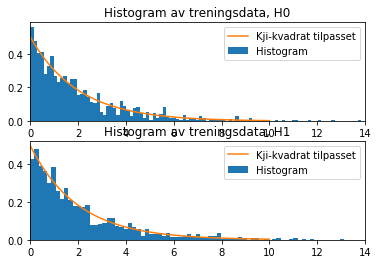

In [7]:
x_H0 = loadFile('T3_data_x_H0')
x_H1 = loadFile('T3_data_x_H1')

x_r_H0 = np.real(x_H0)
x_i_H0 = np.imag(x_H0)
x_r_H1 = np.real(x_H1)
x_i_H1 = np.imag(x_H1)

var_s = np.var(loadFile('T3_data_sigma_s'))
var_w = np.var(loadFile('T3_data_sigma_w'))

print(var_s, var_w)

H0 = 2 * (x_r_H0**2 + x_i_H0**2) / (var_s)
H1 = 2 * (x_r_H1**2 + x_i_H1**2) / (var_s + var_w)

x = np.linspace(0, 10, 100)

bins = 100


df, loc, scale = stats.chi2.fit(H0)
H0_pdf = stats.chi2.pdf(x, 2, 0)
df, loc, scale = stats.chi2.fit(H1)
H1_pdf = stats.chi2.pdf(x, 2, 0)

plt.subplot(2,1,1)
plt.title("Histogram av treningsdata, H0")
plt.xlim(0,14)
plt.hist(H0, bins=bins, normed=True)
plt.plot(x, H0_pdf)
plt.legend(["Kji-kvadrat tilpasset", "Histogram"])

plt.subplot(2,1,2)
plt.title("Histogram av treningsdata, H1")
plt.xlim(0,14)
plt.hist(H1, bins=bins, normed=True)
plt.plot(x, H1_pdf)
plt.legend(["Kji-kvadrat tilpasset", "Histogram"])
plt.show()






The Chi-square pdf fits the pdf of the power function well with 2 degrees of freedom, with the pdf of H0 smaller than H1

## Task 5

['K = 2', 'K = 7', 'K = 12', 'K = 17', 'K = 22', 'K = 27', 'K = 32']


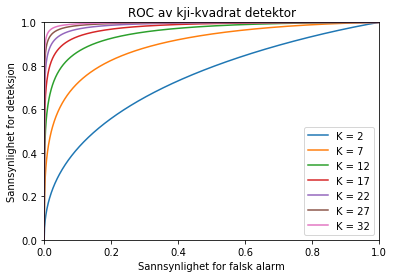

In [111]:

#Computing the Pfa and Pd:

var_s = np.var(loadFile('T3_data_sigma_s'))
var_w = np.var(loadFile('T3_data_sigma_w'))

Pfa = 0.01
N = 100


def n (l, K, var_w, var_s):
        return (np.log(l)*np.log(var_w) - np.log(var_s + var_w) )/((1/(var_s + var_w) - np.log(l)/var_w) ) 

for K in range(2,33,5):
    
    Pfa = np.linspace(0,1,1000) # stats.chi2.sf(K*ns/(var_w),df=K)
    n = stats.chi2.isf(Pfa,df=2*K)*var_w/(2*K)
    #ns = n(np.linspace(0,10,1000), K, var_w, var_s)
    
    Pd = stats.chi2.sf((2*K*n)/((var_w + var_s)),df=2*K)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(Pfa,Pd, label=("K = " + str(K)))
legend = ["K = " + str(i) for i in range(2,33,5)]
print(legend)
plt.legend(legend)
plt.xlabel("Sannsynlighet for falsk alarm")
plt.ylabel("Sannsynlighet for deteksjon")
plt.title("ROC av kji-kvadrat detektor")
plt.show()



### Task 6




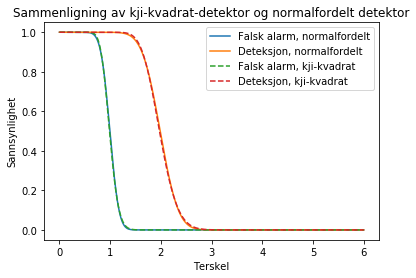

In [81]:
n = np.linspace(0,6,1000)
K = 50
Pfa = stats.norm.sf( (2*K*((n / var_w) - 1))/np.sqrt(4 * K))
Pda = stats.norm.sf((2*K*((n / (var_w + var_s)) - 1))/np.sqrt(4*K))


plt.xlabel("Terskel")
plt.ylabel("Sannsynlighet")

plt.plot(n,Pfa)
plt.plot(n,Pda)

Pfa = stats.chi2.sf(2*K*n/(var_w), df=2*K)
Pda = stats.chi2.sf(2*K*n/((var_w + var_s)), df=2*K)

plt.plot(n,Pfa, linestyle="--")
plt.plot(n,Pda, linestyle="--")

plt.legend(("Falsk alarm, normalfordelt","Deteksjon, normalfordelt","Falsk alarm, kji-kvadrat","Deteksjon, kji-kvadrat") )
plt.title("Sammenligning av kji-kvadrat-detektor og normalfordelt detektor")
plt.show()


### Task 7 numerical examples

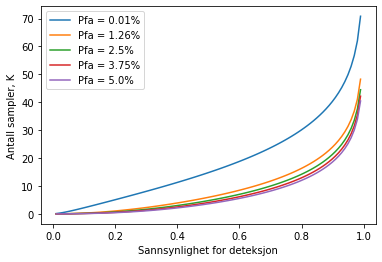

In [82]:
Pfa = 0.1


#def k (pfa,pda):
#    iQpfa = stats.norm.isf(pfa)
#    iQpda = stats.norm.isf(pda)
#    return ( (-np.sqrt(2)*(iQpfa - iQpda*(var_w + var_s)/var_w) - np.sqrt(  2*(iQpfa - iQpda*(var_w + var_s)/var_w)**2  + 4  )   ) /2   )**2
def k (pfa,pda):
    iQpfa = stats.norm.isf(pfa)
    iQpda = stats.norm.isf(pda)
    return ( (-np.sqrt(2)*(iQpfa - iQpda*(var_w + var_s)/var_w) - np.sqrt(  2*(iQpfa - iQpda*(var_w + var_s)/var_w)**2  + 4  )   ) /2   )**2/2
    
legend = []
for fa in np.linspace(0.0001,0.05,5):
    
    pda = np.linspace(0,1,100) # stats.chi2.sf(K*ns/(var_w),df=K)

    #ns = n(np.linspace(0,10,1000), K, var_w, var_s)
    K = k(fa,pda)
    plt.plot(pda,K)
    legend.append("Pfa = " + str(round(fa*100, 2)) + "%")
plt.legend(legend)
plt.ylabel("Antall sampler, K")
plt.xlabel("Sannsynlighet for deteksjon")
plt.show()

### Task 8

1.0808867669229134 1.0800969728465375


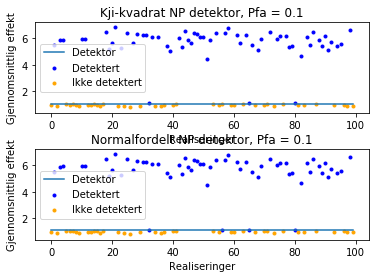

In [102]:
Pfa = 0.1
var_s = 5
var_w = 1
K = 256

signal = loadFile("T8_numerical_experiment")

test = (np.sum(np.square(np.abs(signal)), axis=0))/(K)

def plotDetector(data, n):
    plt.xlabel("Realiseringer")
    plt.ylabel("Gjennomsnittlig effekt")
    color_chi = np.where((data > n) , 'blue', 'orange')
    i = np.where((data > n))
    detected = data[i]
    plt.scatter(i, detected, color="blue", marker=".")
    i = np.where((data < n))
    not_detected = data[i]
    plt.scatter(i, not_detected, color="orange", marker=".")
    plt.plot(np.arange(0,len(data)), np.ones(100)*n)
    plt.legend(["Detektor", "Detektert", "Ikke detektert"])

n_chi = ( stats.chi2.isf(Pfa,df=2*K)* var_w) / (2*K)
n_norm = (var_w * (stats.norm.isf(Pfa)*np.sqrt(4* K) + 2*K))/(2*K)
print(n_chi, n_norm)

plt.subplots_adjust(hspace=0.4)
plt.subplot(2,1,1)
plt.title("Kji-kvadrat NP detektor, Pfa = 0.1")
plotDetector(test,n_chi)

plt.subplot(2,1,2)
plt.title("Normalfordelt NP detektor, Pfa = 0.1")
plotDetector(test,n_norm)
plt.show()



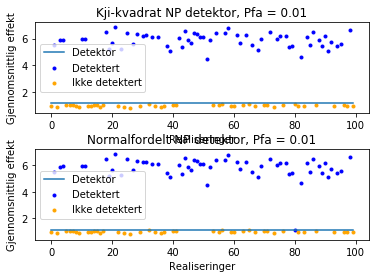

In [103]:
Pfa = 0.01

n_chi = stats.chi2.isf(Pfa,df=2*K) * var_w / (2*K)
n_norm = var_w * (stats.norm.isf(Pfa)*np.sqrt(2 *2* K) + 2*K)/(2*K)


plt.subplots_adjust(hspace=0.4)
plt.subplot(2,1,1)
plt.title("Kji-kvadrat NP detektor, Pfa = 0.01")
plotDetector(test,n_chi)

plt.subplot(2,1,2)
plt.title("Normalfordelt NP detektor, Pfa = 0.01")
plotDetector(test,n_norm)
plt.show()